<a href="https://colab.research.google.com/github/dancoster/DrugLab/blob/dev/Notebooks/Analysis_Top10Drugs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis on Drug<>Labtest pairs of Top 10 Drugs
Run all cells or view results below.

## Import Libraries

In [1]:
import pandas as pd
import datetime
import numpy as np
from scipy.stats import mannwhitneyu
from scipy import stats
from tqdm import tqdm
import os

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
PARENT='/content/drive/MyDrive/TAU'
DATA = PARENT+'/Datasets/mimiciii/1.4'

In [4]:
for i in os.walk(os.path.join(DATA)):
    print(i)

('/content/drive/MyDrive/TAU/Datasets/mimiciii/1.4', [], ['CALLOUT.csv.gz', 'ADMISSIONS.csv.gz', 'CAREGIVERS.csv.gz', 'D_ITEMS.csv.gz', 'D_ICD_PROCEDURES.csv.gz', 'D_ICD_DIAGNOSES.csv.gz', 'ICUSTAYS.csv.gz', 'CHARTEVENTS.csv.gz', 'DRGCODES.csv.gz', 'CPTEVENTS.csv.gz', 'DIAGNOSES_ICD.csv.gz', 'D_CPT.csv.gz', 'D_LABITEMS.csv.gz', 'DATETIMEEVENTS.csv.gz', 'INPUTEVENTS_CV.csv.gz', 'INPUTEVENTS_MV.csv.gz', 'LABEVENTS.csv.gz', 'MICROBIOLOGYEVENTS.csv.gz', 'OUTPUTEVENTS.csv.gz', 'PATIENTS.csv.gz', 'README.md', 'PROCEDURES_ICD.csv.gz', 'PRESCRIPTIONS.csv.gz', 'TRANSFERS.csv.gz', 'PROCEDUREEVENTS_MV.csv.gz', 'SERVICES.csv.gz', 'LICENSE.txt', 'NOTEEVENTS.csv.gz', 'SHA256SUMS.txt', 'index.html'])


## Analysis

### Load Results

In [40]:
results = pd.read_csv(os.path.join(PARENT, 'Drug-Labtest_Pairs_Top10Drugs.csv'))

In [41]:
results = results.drop(columns=['Unnamed: 0'])

In [42]:
results

,Medication Name,Feature Name,Number of patients,Feature Before(mean),Feature Before(std),Time Before(mean),Time Before(std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Mannwhitney-pvalue,Ttest-pvalue
0,Furosemide,"Calcium, Total",3689,7.865194,0.596117,15.318731,3.130199,7.895690,0.767306,12.782805,5.543262,0.000487,0.056653
1,Furosemide,Chloride,1968,106.545224,9.555180,15.720207,3.192894,106.237297,9.658326,11.904870,6.130098,0.015742,0.314740
2,Furosemide,Creatinine,3930,2.309898,1.588903,16.197752,2.726862,2.295802,1.562848,12.027998,6.323819,0.127153,0.691735
3,Furosemide,Phosphate,2442,3.661261,2.088406,15.352662,3.674798,3.619165,2.088854,12.280774,5.934769,0.479578,0.481294
4,Furosemide,Potassium,414,4.069082,1.339911,14.442351,5.496923,4.050725,1.323301,10.155837,6.765043,0.454535,0.842826
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,Docusate Sodium,Calculated Total CO2,480,26.868750,8.603385,16.759549,6.344186,27.554167,8.572738,7.386979,6.572813,0.040627,0.216607
422,Docusate Sodium,"Potassium, Whole Blood",107,4.128972,1.292869,12.129128,8.536525,4.085047,1.282598,8.191900,7.232208,0.322723,0.803220
423,Docusate Sodium,Phenytoin,134,8.267164,6.803181,15.278731,3.094043,8.167164,5.349426,15.054851,3.909030,0.294080,0.893697
424,Docusate Sodium,Troponin T,271,1.312568,2.307688,15.977245,4.758200,1.287048,2.276174,10.673063,6.441718,0.370285,0.896922


### Significance Test - 0.05 P value threshold

In [43]:
results[results['Ttest-pvalue']>0.05]

,Medication Name,Feature Name,Number of patients,Feature Before(mean),Feature Before(std),Time Before(mean),Time Before(std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Mannwhitney-pvalue,Ttest-pvalue
0,Furosemide,"Calcium, Total",3689,7.865194,0.596117,15.318731,3.130199,7.895690,0.767306,12.782805,5.543262,0.000487,0.056653
1,Furosemide,Chloride,1968,106.545224,9.555180,15.720207,3.192894,106.237297,9.658326,11.904870,6.130098,0.015742,0.314740
2,Furosemide,Creatinine,3930,2.309898,1.588903,16.197752,2.726862,2.295802,1.562848,12.027998,6.323819,0.127153,0.691735
3,Furosemide,Phosphate,2442,3.661261,2.088406,15.352662,3.674798,3.619165,2.088854,12.280774,5.934769,0.479578,0.481294
4,Furosemide,Potassium,414,4.069082,1.339911,14.442351,5.496923,4.050725,1.323301,10.155837,6.765043,0.454535,0.842826
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,Docusate Sodium,Calculated Total CO2,480,26.868750,8.603385,16.759549,6.344186,27.554167,8.572738,7.386979,6.572813,0.040627,0.216607
422,Docusate Sodium,"Potassium, Whole Blood",107,4.128972,1.292869,12.129128,8.536525,4.085047,1.282598,8.191900,7.232208,0.322723,0.803220
423,Docusate Sodium,Phenytoin,134,8.267164,6.803181,15.278731,3.094043,8.167164,5.349426,15.054851,3.909030,0.294080,0.893697
424,Docusate Sodium,Troponin T,271,1.312568,2.307688,15.977245,4.758200,1.287048,2.276174,10.673063,6.441718,0.370285,0.896922


In [44]:
significant = results[results['Ttest-pvalue']<=0.05]

### Plots and Analysis

In [45]:
vals = significant.groupby('Medication Name').sum()['Number of patients']

In [46]:
vals

Medication Name
Acetaminophen          60731
Docusate Sodium        44501
Furosemide             21077
Heparin                23947
Insulin                63210
Lorazepam               6758
Metoprolol              3128
Metoprolol Tartrate     1978
Morphine Sulfate       50023
Potassium Chloride     15461
Name: Number of patients, dtype: int64

In [48]:
import matplotlib.pyplot as plt

In [47]:
x = list(vals.keys())
y = list(vals)

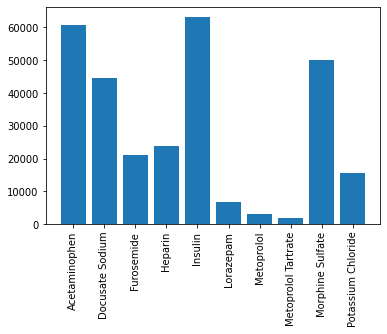

In [51]:
plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()